# Face Aging with CycleGAN

In [44]:
import pandas as pd
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.callbacks import TensorBoard
from keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Reshape, add, LeakyReLU, Lambda, \
     Activation, UpSampling2D, Dropout, Layer, UpSampling2D, ZeroPadding2D, Conv2DTranspose, Flatten, MaxPooling2D, AveragePooling2D
#from keras.optimizers import Adam
from keras_preprocessing import image
import tensorflow as tf
import random


from keras.initializers import RandomNormal
from keras.layers import Concatenate
from keras.models import load_model


#from keras import Input, Model
from keras.models import Model
from keras.layers import Input
#from keras.models import load_model


#from tensorflow.compat.v1 import truncated_normal_initializer
#import keras.engine
#from tensorflow.python.keras.engine.topology import Network


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
path = 'drive/MyDrive/UTK/'

# Test Data

In [47]:
test = pd.DataFrame()
pattern = path + 'Test/*.jpg'
paths = glob(pattern)     #klasör içerisindeki dosyaların filtrelenerek listelenmesini sağlar
test['path'] = paths 
test.head()

,path
0,drive/MyDrive/UTK/Test/25_0_4_2017011600135884...
1,drive/MyDrive/UTK/Test/25_1_0_2017010423494201...
2,drive/MyDrive/UTK/Test/25_0_4_2017011403424457...
3,drive/MyDrive/UTK/Test/25_1_0_2017010318031175...
4,drive/MyDrive/UTK/Test/25_0_4_2017011600310642...


In [48]:
testl = list()
for path in paths:
    split_var = path.split('/')[-1].split('_')
    testl.append(int(split_var[0]))
test['age'] = testl

In [73]:
test_len = len(testl)

In [50]:
test.head()

,path,age
0,drive/MyDrive/UTK/Test/25_0_4_2017011600135884...,25
1,drive/MyDrive/UTK/Test/25_1_0_2017010423494201...,25
2,drive/MyDrive/UTK/Test/25_0_4_2017011403424457...,25
3,drive/MyDrive/UTK/Test/25_1_0_2017010318031175...,25
4,drive/MyDrive/UTK/Test/25_0_4_2017011600310642...,25


In [51]:
test.age.max()

26

In [52]:
test.age.min()

24

In [53]:
Test = []
for filepath in test.path:
    img = np.array(Image.open(filepath).convert('RGB').resize((128, 128)))
    Test.append(img)
Test = np.array(Test)


In [54]:
Test.shape

(1225, 128, 128, 3)

In [55]:
def plot_img(image):
    n_samples = 3
    for i in range(n_samples):
        plt.subplot(2, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(image[i])

        plt.subplot(2, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(image[i+3])
    plt.show()

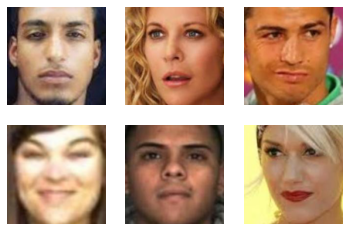

In [56]:
plot_img(Test)

In [57]:
def fake_samples(generator, images, out_shape):
	X = generator.predict(images)
	y = np.zeros((len(X), out_shape, out_shape, 1))
	return X, y

In [58]:
def plot_img3(step, generator, images, name, n_samples=5):
    X_in= images[step:step+5,:]
    X_out, _ = fake_samples(generator, X_in, 0)
    #görüntülerin gösterilebilmesi için [0,1] arasına döndürülüyor 
    X_out = (X_out+ 0.15) /2.0
    plt.figure(figsize=(15, 5))
    for i in range(n_samples):
        plt.subplot(2, n_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_in[i])

    for i in range(n_samples):
        plt.subplot(2, n_samples, 1 + n_samples + i)
        plt.axis('off')
        plt.imshow(X_out[i])
    plt.show()
    figure = 'Fakes/%s_generated_plot_%06d.png' % (name, (step+1))
    #plt.savefig(figure)
    #plt.close()
    


In [59]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-mjambe1k
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-mjambe1k


In [60]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization,InputSpec

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


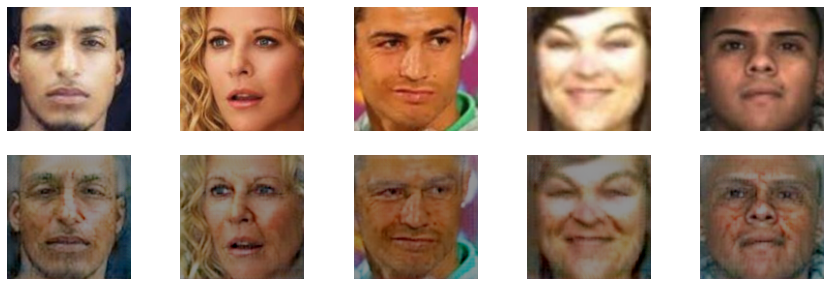

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


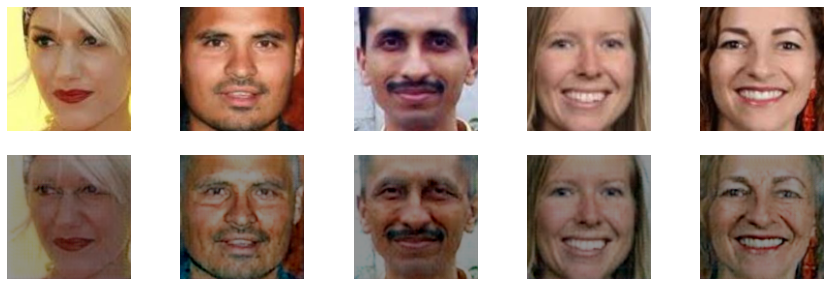

In [61]:
cust = {'InstanceNormalization': InstanceNormalization, 'tf': tf}
generator_AtoB_ =  load_model('/content/drive/My Drive/UTK/Generated/g_model_AtoB_049000.h5',cust, compile=False)
for i in range(0,10,5):
    plot_img3(i,generator_AtoB_, Test, 'AtoB')
    
  

Burada görüntülerin beyazımsı olmasının sebebi Colab kaynaklıdır. Arayüzde çıktılar beyazsımı değildir.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


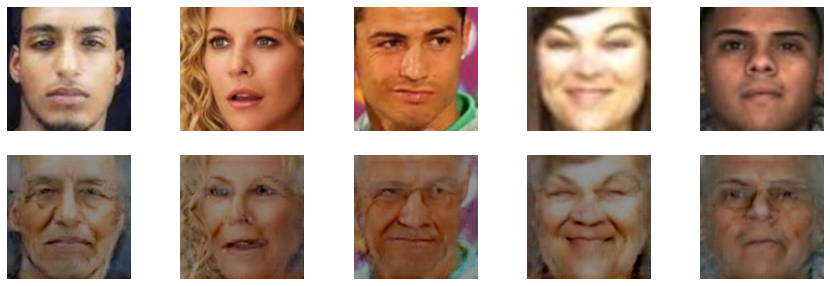

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


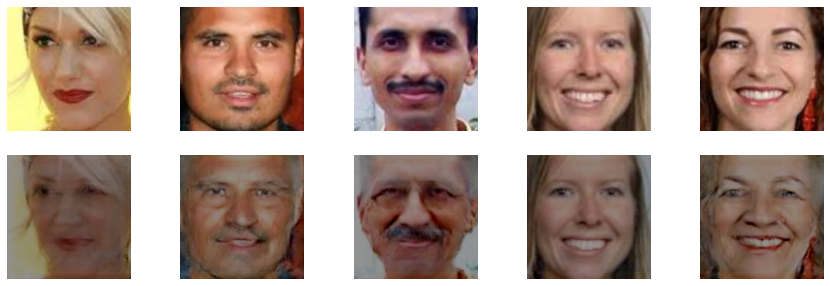

In [62]:
generator_AtoB =  load_model('/content/drive/My Drive/UTK/Generated/g_model_AtoB_068000.h5',cust,compile=False)
for i in range(0,10,5):
    plot_img3(i,generator_AtoB, Test, 'AtoB')
    

# FID

In [63]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
import numpy as np

from keras.datasets.mnist import load_data
from skimage.transform import resize

In [64]:
def calculate_fid(images1, images2):
    mu1, sigma1 = images1.mean(axis=0), cov(images1, rowvar=False)
    mu2, sigma2 = images2.mean(axis=0), cov(images2, rowvar=False)
    
    ssdiff = np.sum((mu1 - mu2)**2.0)
 
    covmean = sqrtm(sigma1.dot(sigma2))
   
    if iscomplexobj(covmean):
        covmean = covmean.real
 
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [65]:
def preprocess_fid(test_len,Test):
    images1 = []
    images2 = []

    for i in range(test_len):
        y = Test[i:i+1, :]
        y = (y + 1) / 2.0
        fake = generator_AtoB_.predict(y)
        fake = (fake + 1) / 2.0
        fake = Image.fromarray(np.uint8(fake[0]*255)).convert('L')
        fake_l= np.array(fake)
        images1.append(fake_l)
        y = Image.fromarray(np.uint8(y[0]*255)).convert('L')
        y_l = np.array(y)
        images2.append(y_l)
    return images1, images2

In [66]:
images1, images2 = preprocess_fid(test_len,Test)

In [67]:
images1 = np.array(images1)
images2 = np.array(images2)


In [68]:
from keras.applications.inception_v3 import preprocess_input
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)

In [69]:
fids = []
sum = 0.0
for i in range(test_len):
    fid = calculate_fid(images1[i], images2[i])
    fids.append(fid)
    sum+=fid


In [77]:
sum/2000

36.73899992364229

In [71]:
fids

[65.473357571172,
 59.86223689701315,
 49.17515586432164,
 90.85615731952579,
 39.551861534254655,
 90.37854195008977,
 50.250988238389816,
 57.22050923562938,
 62.81201478774181,
 64.09864571647773,
 43.45943423601337,
 92.86479773718416,
 63.975611540444405,
 74.01342063334457,
 97.78794137719353,
 105.30988375490101,
 40.196949680916866,
 75.13104302757748,
 66.51008842025871,
 60.92743652316265,
 65.03291223717812,
 84.72147476914182,
 107.88651553470291,
 91.32732718024127,
 75.77267139187096,
 59.414950878148,
 71.08841983634204,
 64.52614418494346,
 84.79185059082693,
 61.28901975282498,
 81.12685804553311,
 56.6818464816403,
 72.56437487585578,
 77.6431028706648,
 65.38154890367004,
 85.08159340808291,
 58.5385999147241,
 60.93800081081697,
 58.272214108355996,
 26.04922831275967,
 103.91363031274548,
 43.28661668744649,
 91.2241993289611,
 111.65315791634393,
 60.341659362518264,
 94.16263449460455,
 67.77523854395284,
 92.6857912057602,
 53.44878363488378,
 90.05953106867939,